# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from scipy import stats

da = pd.read_csv("nhanes_2015_2016.csv")
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

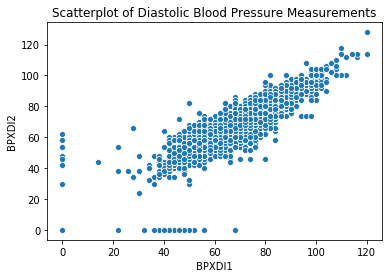

          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000


In [7]:
# enter your code here
sns.scatterplot(data=da, x="BPXDI1", y="BPXDI2")
plt.title("Scatterplot of Diastolic Blood Pressure Measurements")
plt.xlabel("BPXDI1")
plt.ylabel("BPXDI2")
plt.show()

# Correlation matrix
correlation_matrix = da[["BPXDI1", "BPXDI2"]].corr()
print(correlation_matrix)

          BPXSY1    BPXSY2
BPXSY1  1.000000  0.962287
BPXSY2  0.962287  1.000000


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


          BPXDI1    BPXDI2
BPXDI1  1.000000  0.884722
BPXDI2  0.884722  1.000000


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


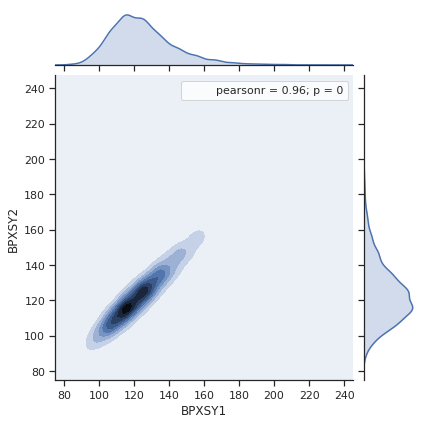

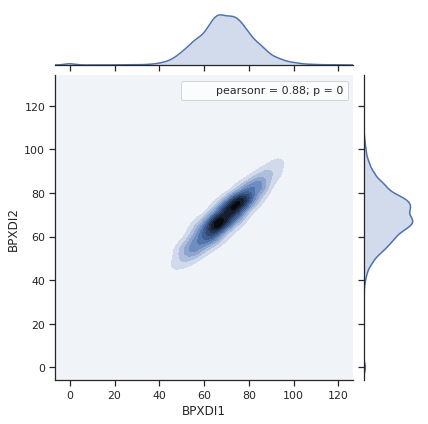

In [16]:
print(da[["BPXSY1", "BPXSY2"]].dropna().corr()) #correlation for the systolic blood pressure
a = sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da).annotate(stats.pearsonr)

print(da[["BPXDI1", "BPXDI2"]].dropna().corr()) #correlation for the diastolic blood pressure
b = sns.jointplot(x="BPXDI1", y="BPXDI2", kind='kde', data=da).annotate(stats.pearsonr)

__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?


- The pearson correlation between the systolic blood pressure is **0.96** which indicates that the relationship between the variables is very strong.
- The pearson correlation between the distolic blood pressure is **.88**, which is lower than the systolic blood pressure but it is still high enough to consider their relationship pretty strong.



__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

          BPXSY1    BPXDI1
BPXSY1  1.000000  0.316531
BPXDI1  0.316531  1.000000


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


          BPXSY2    BPXDI2
BPXSY2  1.000000  0.303847
BPXDI2  0.303847  1.000000


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


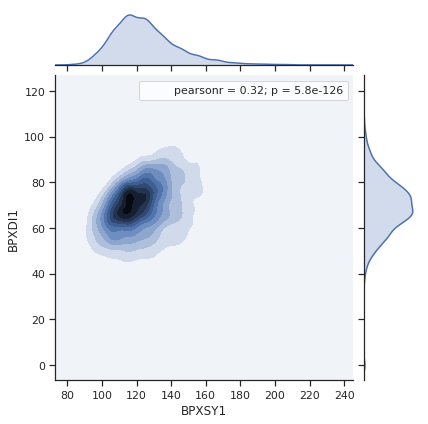

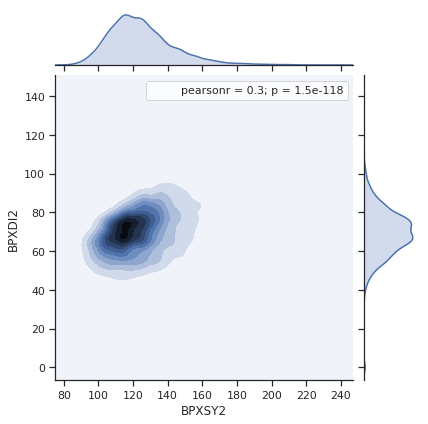

In [17]:
print(da[["BPXSY1", "BPXDI1"]].dropna().corr()) #correlation for the first systolic blood pressure and the first diastolic blood pressure
c = sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da).annotate(stats.pearsonr)

print(da[["BPXSY2", "BPXDI2"]].dropna().corr()) #correlation for the second systolic blood pressure and the second diastolic blood pressure
d = sns.jointplot(x="BPXSY2", y="BPXDI2", kind='kde', data=da).annotate(stats.pearsonr)

### **The first systolic blood pressure and the first diastolic blood pressure has a higher strength compared to  the second diastolic blood pressure and the second systolic blood pressure**


## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

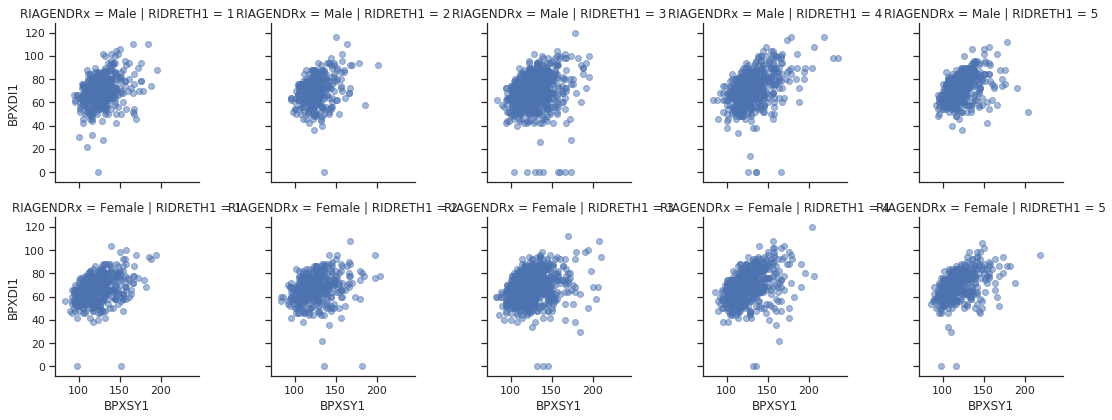

In [21]:
# insert your code here
da["RIAGENDRx"] = da["RIAGENDR"].map({1: "Male", 2: "Female"}) 
first_systolic_dystolic= sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

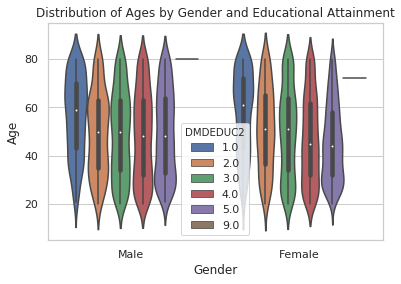

In [25]:
# insert your code here
# Create a violin plot using the 'violinplot' function in Seaborn
sns.set(style="whitegrid")
sns.violinplot(data=da, x="RIAGENDRx", y="RIDAGEYR", hue="DMDEDUC2")

# Set titles and labels
plt.title("Distribution of Ages by Gender and Educational Attainment")
plt.xlabel("Gender")
plt.ylabel("Age")

# Show the plot
plt.show()


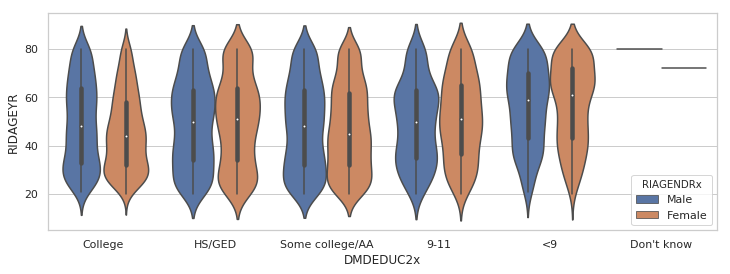

In [26]:
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da["DMDMARTLx"] = da.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})
plt.figure(figsize = (12,4))
ages_gender_educational_attainment = sns.violinplot(da.DMDEDUC2x, da.RIDAGEYR, da.RIAGENDRx)

__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

The violin plot above shows that the age group for male and female with college degrees and some college/AA is right skewed whereas the age group for male and female with less than 9th grade education is left skewed. The data for HS/GED and 9-11 grade is symmetric or equally distributed.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [27]:
# insert your code here
da["RIDAGEYR"].describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

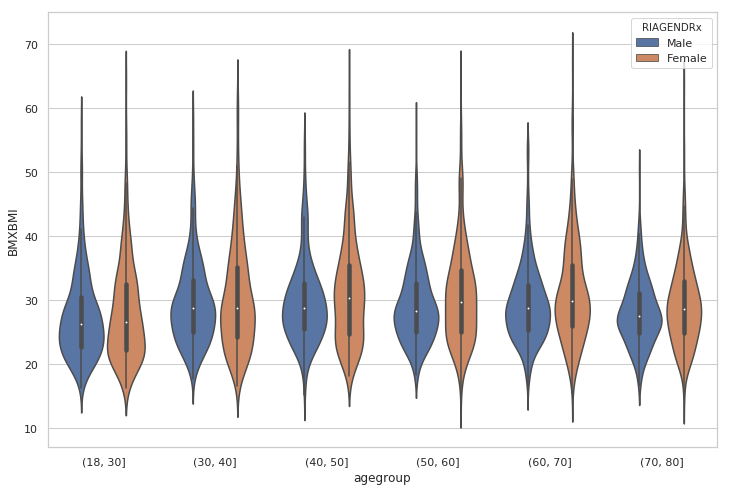

In [28]:
da["agegroup"] = pd.cut(da.RIDAGEYR, [18,30,40,50,60,70,80])
plt.figure(figsize = (12,8))
BMI_by_age_gender = sns.violinplot(x = da.agegroup, y = da.BMXBMI, hue = da.RIAGENDRx )

__Q5a.__ Comment on the trends in BMI across the demographic groups.

The BMI is right skewed for females at the lowest age group. As we increase the age, the BMI increases and becomes symmetrical. The BMI for large amount of makes is distributed close to the median.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [29]:
# insert your code here
da["RIDRETH1x"] = da.RIDRETH1.replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 
                                      4: "Non-Hispanic Black", 5: "Other Race - Including Multi-Racial"})
da["HIQ210x"] = da.HIQ210.replace({1: "Yes", 2: "No", 7: "Refused", 9: "Don't Know"})
da["HIQ210x"].fillna("Missing", inplace = True)
freq_table = pd.crosstab(da.RIDRETH1x, da.HIQ210x)
freq_table.apply(lambda z: z/z.sum(), axis = 1)

HIQ210x,Don't Know,Missing,No,Yes
RIDRETH1x,,,,
Mexican American,0.002947,0.337917,0.567780,0.091356
Non-Hispanic Black,0.000815,0.152404,0.754686,0.092095
Non-Hispanic White,0.001088,0.103861,0.834693,0.060359
Other Hispanic,0.000000,0.233333,0.668000,0.098667
Other Race - Including Multi-Racial,0.002220,0.117647,0.807991,0.072142


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?

Non-hispanic whites answered 'NO' the most compared to the total for the race. Therefore, Non-Hispanic whites has the highest rate of being uninsured in the past year.